In [ ]:
#descargo los modulos y librerias que se utilizan 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import Muestras2 as ms

   index    i      j       R_min       R_max       R_avg
0      0  h_1    h_2    1.789228    1.789278    1.789253
1      1  h_1    a_1  347.545800  347.780300  347.663000
2      2  h_1    a_3    1.846655    1.847015    1.846835
3      3  h_1    a_4   64.951110   64.967660   64.959340
4      4  h_1  a_4_2   65.037330   65.053420   65.045370


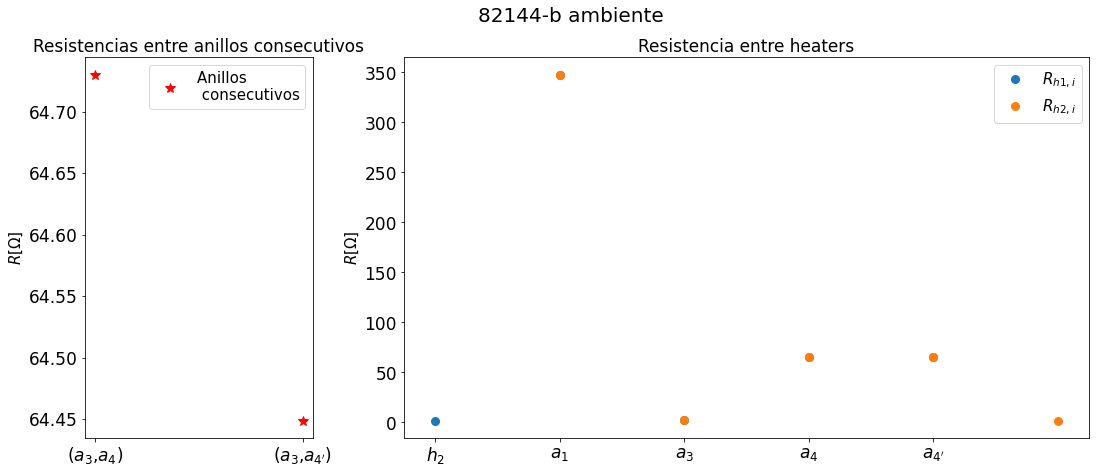

In [37]:

info_muestras = ms.pd.read_excel('data/info_muestras_1.xlsx')

name = '82144-b'
row = info_muestras[info_muestras['Nombre'] == name]
muestra = ms.Muestra(name, row['Tipo'].iloc[0], row['Anillos'].iloc[0], row['Contactos'].iloc[0], row['Soldaduras'].iloc[0], row['Heater'].iloc[0])
    
muestra.set_resistencias_mediciones_amb_corbino()
    
#%%

f, (a1, a0) = plt.subplots(1, 2, figsize=(18,7), gridspec_kw={'width_ratios': [1, 3]})

#preparo un df con todas las mediciones de h1
df_h1 = muestra.medicion_amb.R.loc[(muestra.medicion_amb.R['i']== 'h_1') | (muestra.medicion_amb.R['j']== 'h_1')].copy()   
print(df_h1)
id_h1 = (df_h1['j'] == 'h_1')
df_h1.loc[id_h1,['i','j']] = df_h1.loc[id_h1,['j','i']].values

#preparo un df con todas las mediciones de h2
df_h2 = muestra.medicion_amb.R.loc[(muestra.medicion_amb.R['i']== 'h_2') | (muestra.medicion_amb.R['j']== 'h_2')].copy()   
id_h2 = (df_h2['j'] == 'h_2')
df_h2.loc[id_h2,['i','j']] = df_h2.loc[id_h2,['j','i']].values

f.suptitle(f'{muestra.nombre} ambiente',fontsize = 20)
x_ticks = [r"$h_2$",r"$a_1$",r"$a_3$",r"$a_4$",r"$a_{4'}$"]
a0.set(xticks=range(5), xticklabels=x_ticks)
a0.set_title('Resistencia entre heaters',fontsize = 17)
a0.plot(df_h1['j'],df_h1['R_avg'],'o',markersize=8,label='$R_{h1,i}$')
a0.plot(df_h2['j'],df_h2['R_avg'],'o',markersize=8,label='$R_{h2,i}$')
a0.set_ylabel(r'$R[\Omega$]',fontsize = 15)
a0.legend(fontsize = 15)
a0.tick_params(axis='both', labelsize=17)

#
#plot contactos pares
R_par = []
x_ticks = []

#a1, a2,...,h1, etc:
#elementos = list(set(pd.concat([muestra.medicion_amb.R['i'],muestra.medicion_amb.R['j']])))

ticks = [('a_3', 'a_4'),('a_3', 'a_4_2')] 
x_ticks = []
R_tick = []
for i in ticks:
    R_tick_df = muestra.medicion_amb.R.loc[(muestra.medicion_amb.R['i']== i[0]) & (muestra.medicion_amb.R['j']== i[1])]
    R_tick_i = list(R_tick_df['R_avg'])
    if len(R_tick_i) >0:
    
        R_tick.append(R_tick_i[0])
        x_ticks.append(str(i))
    

a1.set_title('Resistencias entre anillos consecutivos',fontsize = 17)
a1.plot(R_tick,'*',color='red',markersize=10,label='Anillos \n consecutivos')
x_ticks = [r"($a_3$,$a_4$)",r"($a_3$,$a_{4'}$)"]
a1.set(xticks=range(2), xticklabels=x_ticks)
a1.set_ylabel(r'$R[\Omega$]',fontsize = 15)
a1.legend(fontsize = 15)
a1.tick_params(axis='both', labelsize=17)

plt.savefig(f'figs/ambiente_2plots/{muestra.nombre}_amb.png', bbox_inches="tight")
    
#%%



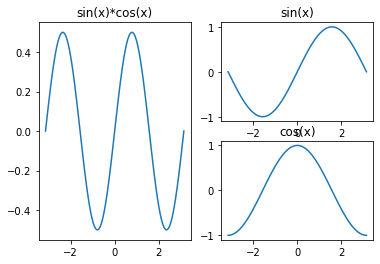

In [24]:
from matplotlib import pyplot as plt
import numpy as np

b=np.linspace(-np.pi, np.pi, 100)

a1=np.sin(b)

a2=np.cos(b)

a3=a1*a2

plt.subplot(222)
plt.plot(b, a1)
plt.title('sin(x)')

plt.subplot(224)
plt.plot(b, a2)
plt.title('cos(x)')

plt.subplot(121)
plt.plot(b, a3)
plt.title('sin(x)*cos(x)')

plt.show()